In [1]:
from keras_preprocessing.text import text_to_word_sequence, Tokenizer
from nltk.tokenize import WordPunctTokenizer
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict

## File path

In [2]:
file_path = 'C:/Users/SJH/OneDrive - korea.ac.kr/문서/MBTI 500.csv'
USER_SAMPLE = 1

## Date Load & check

In [3]:
data = pd.read_csv(file_path, encoding = "UTF-8")

In [4]:
if USER_SAMPLE :
    data = data.groupby('type').sample(frac = 0.2)
data.reset_index(drop = True, inplace = True)

In [5]:
X, y = data.drop('type', axis = 1), data['type']

## Distribution of label and so on

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21213 entries, 0 to 21212
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   posts   21213 non-null  object
 1   type    21213 non-null  object
dtypes: object(2)
memory usage: 331.6+ KB


In [7]:
data.isnull().sum()

posts    0
type     0
dtype: int64

In [8]:
print(X.nunique(), len(X)) # Same

posts    21213
dtype: int64 21213


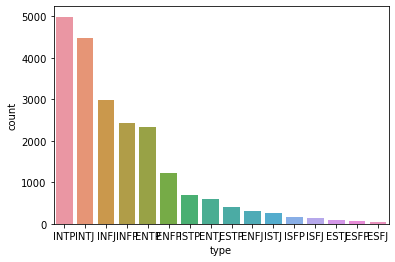

      posts
type       
ENFJ    307
ENFP   1233
ENTJ    591
ENTP   2345
ESFJ     36
ESFP     72
ESTJ     96
ESTP    397
INFJ   2993
INFP   2427
INTJ   4485
INTP   4992
ISFJ    130
ISFP    175
ISTJ    249
ISTP    685
INTP    0.235327
INTJ    0.211427
INFJ    0.141093
INFP    0.114411
ENTP    0.110545
ENFP    0.058125
ISTP    0.032292
ENTJ    0.027860
ESTP    0.018715
ENFJ    0.014472
ISTJ    0.011738
ISFP    0.008250
ISFJ    0.006128
ESTJ    0.004526
ESFP    0.003394
ESFJ    0.001697
Name: type, dtype: float64


In [9]:
sns.countplot(x='type', data=data, order=y.value_counts().index)
plt.show()
count = data.groupby('type').count()

count.sort_values(by=['posts'], ascending=False)
print(count, y.value_counts(normalize=True), sep = '\n======================\n')

## Top 3000 words

In [10]:
tokenizer_top_words = Tokenizer(oov_token="<OOV>", split=' ', num_words=3000)
tokenizer_top_words.fit_on_texts(X.iloc[:, 0])
tokenizer_top_words.index_word

{1: '<OOV>',
 2: 'like',
 3: 'think',
 4: 'people',
 5: 'get',
 6: 'thing',
 7: 'make',
 8: 'know',
 9: 'feel',
 10: 'one',
 11: 'go',
 12: 'time',
 13: 'say',
 14: 'good',
 15: 'would',
 16: 'really',
 17: 'want',
 18: 'way',
 19: 'see',
 20: 'also',
 21: 'work',
 22: 'much',
 23: 'something',
 24: 'try',
 25: 'take',
 26: 'find',
 27: 'type',
 28: 'even',
 29: 'well',
 30: 'friend',
 31: 'need',
 32: 'lot',
 33: 'use',
 34: 'love',
 35: 'life',
 36: 'someone',
 37: 'mean',
 38: 'come',
 39: 'look',
 40: 'could',
 41: 'talk',
 42: 'though',
 43: 'person',
 44: 'give',
 45: 'always',
 46: 'never',
 47: 'right',
 48: 'interest',
 49: 'seem',
 50: 'actually',
 51: 'understand',
 52: 'year',
 53: 'help',
 54: 'still',
 55: 'tell',
 56: 'u',
 57: 'read',
 58: 'point',
 59: 'pretty',
 60: 'function',
 61: 'day',
 62: 'sure',
 63: 'start',
 64: 'bad',
 65: 'first',
 66: 'probably',
 67: 'long',
 68: 'intj',
 69: 'intp',
 70: 'different',
 71: 'anything',
 72: 'best',
 73: 'relationship',
 74

In [11]:
# only 3000 words encoding
# tmp = X.head(10)
X_tp_words = X.copy()
X_tp_words['tok_tw'] = X_tp_words.apply(lambda v : tokenizer_top_words.texts_to_sequences([v['posts']]), axis = 1)

In [12]:
X_tp_words['tok_tw'] = X_tp_words.apply(lambda v: np.array(v['tok_tw']).reshape(-1, 1).tolist(), axis = 1)

In [13]:
X_tp_words['tok_tw_bool']=X_tp_words.apply(lambda v: list(map(lambda t: int(t[0] > 1), v['tok_tw'])), axis = 1)

## Words used more than 1000 times

In [14]:
word_dict = tokenizer_top_words.word_counts
word_dict = OrderedDict(sorted(word_dict.items(), key = lambda t : t[-1],reverse= True))

In [15]:
word_dict_top = []
for i, (key, value) in enumerate(word_dict.items()) :
    if value >= 1000 :
        word_dict_top.append(key)
print(f"size is {len(word_dict_top)}")

size is 1494


In [16]:
# Boolean encoding
X_freq_words = X.copy()
X_freq_words['tok_tw'] = X_freq_words.apply(lambda v : WordPunctTokenizer().tokenize(v['posts']), axis = 1)

In [17]:
X_freq_words['tok_tw_bool'] = X_freq_words.apply(lambda row : [1 if x in row['tok_tw'] else 0 for x in word_dict_top], axis = 1)
X_freq_words

,posts,tok_tw,tok_tw_bool
0,lot horrible flirt cue always admire enfp frie...,"[lot, horrible, flirt, cue, always, admire, en...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, ..."
1,seem pride think great hallmark enfj make feel...,"[seem, pride, think, great, hallmark, enfj, ma...","[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, ..."
2,value insensitive close mind feel depress assu...,"[value, insensitive, close, mind, feel, depres...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,run part gamebar gamecafé haha love yay enfjs ...,"[run, part, gamebar, gamecafé, haha, love, yay...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4,feel say like expose say anything understand f...,"[feel, say, like, expose, say, anything, under...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, ..."
...,...,...,...
21208,go end pretty much use text specific short com...,"[go, end, pretty, much, use, text, specific, s...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
21209,sure address concept function incidentally exa...,"[sure, address, concept, function, incidentall...","[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, ..."
21210,take part one people go fuck think horrible co...,"[take, part, one, people, go, fuck, think, hor...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
21211,social lesson figure ignore think people alrea...,"[social, lesson, figure, ignore, think, people...","[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [18]:
X_freq_words['tok_tw_in'] = X_freq_words.apply(lambda row : [1 if x in word_dict_top else 0 for x in row['tok_tw']], axis = 1)
X_freq_words

,posts,tok_tw,tok_tw_bool,tok_tw_in
0,lot horrible flirt cue always admire enfp frie...,"[lot, horrible, flirt, cue, always, admire, en...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, ...","[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,seem pride think great hallmark enfj make feel...,"[seem, pride, think, great, hallmark, enfj, ma...","[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, ...","[1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, ..."
2,value insensitive close mind feel depress assu...,"[value, insensitive, close, mind, feel, depres...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, ..."
3,run part gamebar gamecafé haha love yay enfjs ...,"[run, part, gamebar, gamecafé, haha, love, yay...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, ..."
4,feel say like expose say anything understand f...,"[feel, say, like, expose, say, anything, under...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, ...","[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
...,...,...,...,...
21208,go end pretty much use text specific short com...,"[go, end, pretty, much, use, text, specific, s...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, ..."
21209,sure address concept function incidentally exa...,"[sure, address, concept, function, incidentall...","[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, ...","[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, ..."
21210,take part one people go fuck think horrible co...,"[take, part, one, people, go, fuck, think, hor...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, ..."
21211,social lesson figure ignore think people alrea...,"[social, lesson, figure, ignore, think, people...","[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


## Dataframe print

In [19]:
X_tp_words

,posts,tok_tw,tok_tw_bool
0,lot horrible flirt cue always admire enfp frie...,"[[32], [1145], [1410], [2420], [45], [1687], [...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,seem pride think great hallmark enfj make feel...,"[[49], [1814], [3], [97], [1], [532], [7], [9]...","[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,value insensitive close mind feel depress assu...,"[[186], [1], [160], [90], [9], [690], [354], [...","[1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, ..."
3,run part gamebar gamecafé haha love yay enfjs ...,"[[267], [108], [1], [1], [263], [34], [2149], ...","[1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, ..."
4,feel say like expose say anything understand f...,"[[9], [13], [2], [2067], [13], [71], [51], [9]...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
...,...,...,...
21208,go end pretty much use text specific short com...,"[[11], [94], [59], [22], [33], [701], [455], [...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, ..."
21209,sure address concept function incidentally exa...,"[[62], [1203], [519], [60], [1], [187], [15], ...","[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
21210,take part one people go fuck think horrible co...,"[[25], [108], [10], [4], [11], [133], [3], [11...","[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, ..."
21211,social lesson figure ignore think people alrea...,"[[126], [1478], [243], [561], [3], [4], [219],...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [20]:
X_freq_words

,posts,tok_tw,tok_tw_bool,tok_tw_in
0,lot horrible flirt cue always admire enfp frie...,"[lot, horrible, flirt, cue, always, admire, en...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, ...","[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,seem pride think great hallmark enfj make feel...,"[seem, pride, think, great, hallmark, enfj, ma...","[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, ...","[1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, ..."
2,value insensitive close mind feel depress assu...,"[value, insensitive, close, mind, feel, depres...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, ..."
3,run part gamebar gamecafé haha love yay enfjs ...,"[run, part, gamebar, gamecafé, haha, love, yay...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, ..."
4,feel say like expose say anything understand f...,"[feel, say, like, expose, say, anything, under...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, ...","[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
...,...,...,...,...
21208,go end pretty much use text specific short com...,"[go, end, pretty, much, use, text, specific, s...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, ..."
21209,sure address concept function incidentally exa...,"[sure, address, concept, function, incidentall...","[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, ...","[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, ..."
21210,take part one people go fuck think horrible co...,"[take, part, one, people, go, fuck, think, hor...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, ..."
21211,social lesson figure ignore think people alrea...,"[social, lesson, figure, ignore, think, people...","[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
